In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 6.3 MB 23.9 MB/s 
     |████████████████████████████████| 15.4 MB 40.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

a. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

In [ ]:
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
reg = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf")
reg
com = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf")
com
prov = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf")
prov
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf")
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


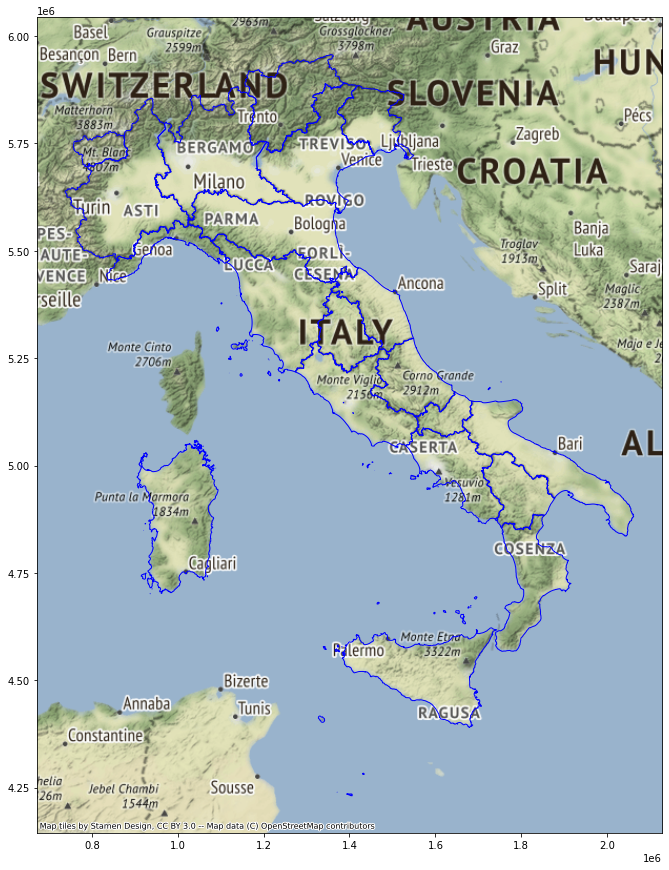

In [ ]:
ax = reg = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf").to_crs(epsg = 3857).plot(facecolor = "None", edgecolor = "b", figsize = (20,15))
ctx.add_basemap(ax)

b. sostituire alla cartina geografica dell'Italia un altro tipo di mappa

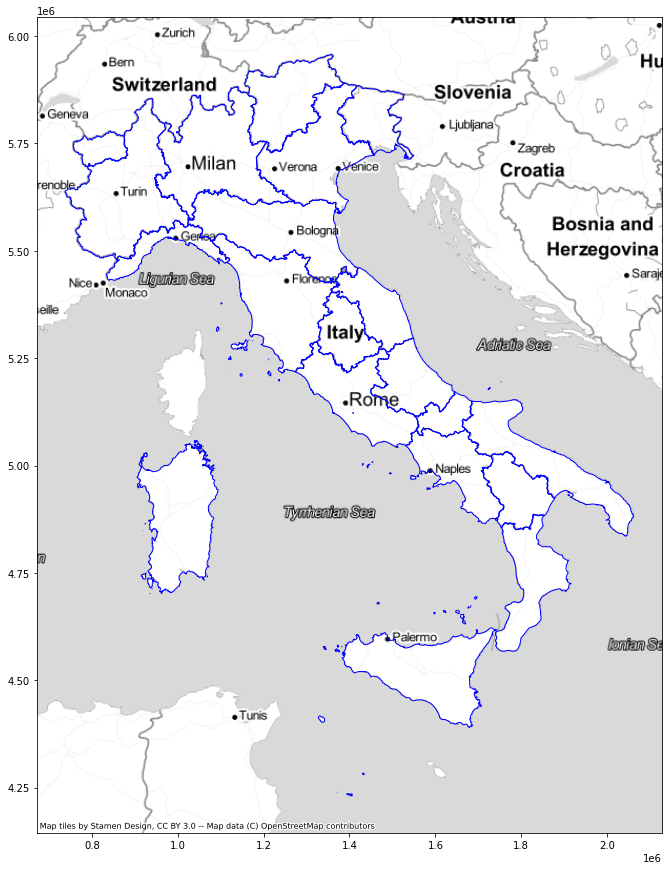

In [ ]:
import xyzservices.providers as xyz
ax = reg = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf").to_crs(epsg = 3857).plot(facecolor = "None", edgecolor = "b", figsize = (20,15))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

c. visualizzare le province della Lombardia su una mappa di contextily

In [ ]:
#   vedere i quartieri su una mappa

lombardia = reg[reg["DEN_REG"] == "Lombardia"].geometry.squeeze()
ax = prov[prov.within(lombardia)].to_crs(epsg=3857).plot(edgecolor = "k", facecolor = "None", figsize = (15,12))
ctx.add_basemap(ax)

#                                    ????????????????????

TypeError: ignored

d. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

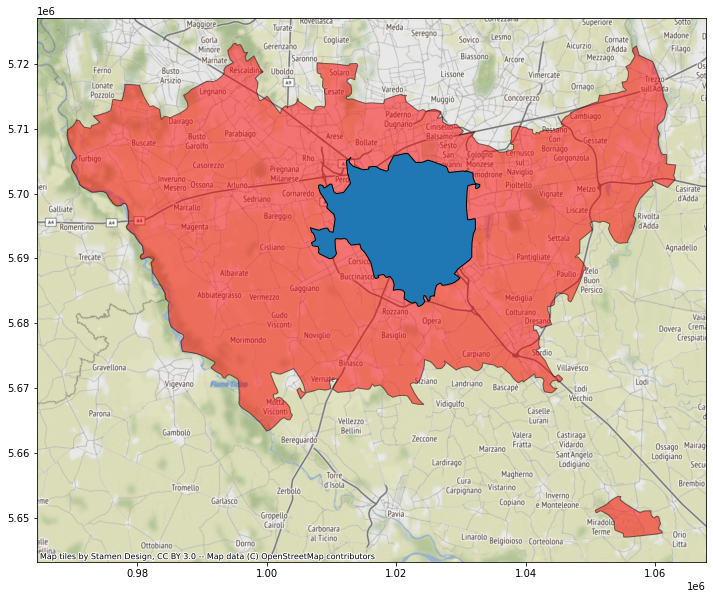

In [ ]:
prov_milano = prov[prov["SIGLA"] == "MI"]
com_milano = com[com["COMUNE"] == "Milano"]
ax = prov_milano.to_crs(epsg=3857).plot(edgecolor = "k", alpha = 0.5, facecolor = "r", figsize = (15,10))

###   ax=ax    ----->   serve per sovvraporre 2 immagini
com_milano.to_crs(epsg=3857).plot(ax = ax, edgecolor = "k")
ctx.add_basemap(ax)

e. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri

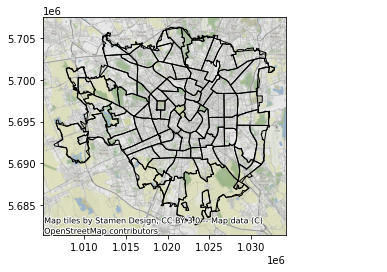

In [ ]:
ax = quartieri.to_crs(epsg = 3857).plot(edgecolor = "k", facecolor = "None")

###   ax=ax    ----->   serve per sovvraporre 2 immagini
com_milano.to_crs(epsg=3857).plot(ax = ax, edgecolor = "k", facecolor = "None")

ctx.add_basemap(ax)

f. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia

In [ ]:

#                                    ????????????????????


prov_lombardia = prov[prov.within(lombardia)]
a = input("inserire una provincia della lombardia: ")
lst = list(prov_lombardia["DEN_UTS"])
if a not in lst:
  print("inesistente")
else:
  p1 = prov_lobardia[prov_lobardia["DEN_UTS"] == a].geometry.squeeze()
  p2 = prov_lobardia[prov_lobardia["DEN_UTS"] == a]
  ax = prov_lobardia[prov_lobardia.touches(p1)].to_crs(epsg = 3857).plot(edgecolor = "k")
  p2.to_crs(epsg = 3857).plot(ax=ax, color = "r", edgecolor = "k")
  ctx.add_basemap(ax)